In [130]:
import pandas as pd
import numpy as np
import seaborn as sb
import plotly.express as px
import sklearn as sk
import matplotlib.pyplot as plt

In [131]:
columns = ["class","Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols",  "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
df = pd.read_csv('datasets/wine.data', names = columns)
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


EXPLORACIÓN DE DATOS

In [132]:
print(len(df.columns))

14


TIPO DE DATOS

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

Medidas Estadisticas de los datos

In [134]:
df.describe()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


*INCONSISTENCIAS*

In [135]:
df.notnull().sum()

class                           178
Alcohol                         178
Malic acid                      178
Ash                             178
Alcalinity of ash               178
Magnesium                       178
Total phenols                   178
Flavanoids                      178
Nonflavanoid phenols            178
Proanthocyanins                 178
Color intensity                 178
Hue                             178
OD280/OD315 of diluted wines    178
Proline                         178
dtype: int64

In [136]:
df.isna().sum()

class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

<AxesSubplot:>

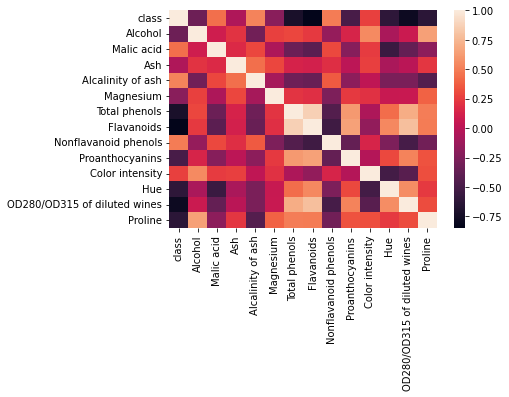

In [137]:
import seaborn as sns
corr = df.corr()  # Coeficiente de Pearson
sns.heatmap(corr)

MODELADO

In [138]:
x = df[["Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols",  "Flavanoids", "Nonflavanoid phenols",
        "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]].values
y = df[['Alcohol']].values


In [139]:
# importamos la herramienta para dividir los datos de SciKit-Learn
from sklearn.model_selection import train_test_split

# asignación de los datos 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [150]:
# importamos la clase de regresión lineal
from sklearn.linear_model import LinearRegression

modelo_regresion = LinearRegression()  # modelo de regresión

In [141]:
# aprendizaje automático con base en nuestros datos
modelo_regresion.fit(X_train, y_train)


LinearRegression()

In [142]:

x_columns = ["Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols",  "Flavanoids", "Nonflavanoid phenols",
             "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

coeff_df = pd.DataFrame(modelo_regresion.coef_[0], x_columns, columns=['Coeficientes'])
modelo_regresion.coef_


array([[ 0.13802069, -0.03660808, -0.04290447,  0.00163565, -0.04524771,
         0.00134568, -0.04386236,  0.14566042,  0.13904561,  0.20799682,
         0.00114922]])

In [143]:
# probamos nuestro modelo con los valores de prueba
y_pred = modelo_regresion.predict(X_test)
y_pred = y_pred.reshape(1, 36)
y_test = y_test.reshape(1, 36)

In [144]:
# creamos un dataframe con los valores actuales y los de predicción
validacion = pd.DataFrame({'Actual': y_test[0], 'Predicted': y_pred[0], 'Diferencia': y_test[0] - y_pred[0] })
validacion.head(10)

,Actual,Predicted,Diferencia
0,13.74,13.606551,0.133449
1,12.77,12.521205,0.248795
2,12.37,12.646679,-0.276679
3,13.86,12.084701,1.775299
4,12.04,12.552389,-0.512389
5,14.21,13.789874,0.420126
6,12.37,12.438694,-0.068694
7,13.20,13.674799,-0.474799
8,14.16,13.381446,0.778554
9,12.52,12.018452,0.501548


In [147]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_pred = y_pred.reshape(36, 1)
y_test = y_test.reshape(36, 1)
# importamos la métrica R cuadrada (coeficiente de determinación)
r2_score(y_test, y_pred)  # ingresamos nuestros valores reales y calculados


0.4651598625460165

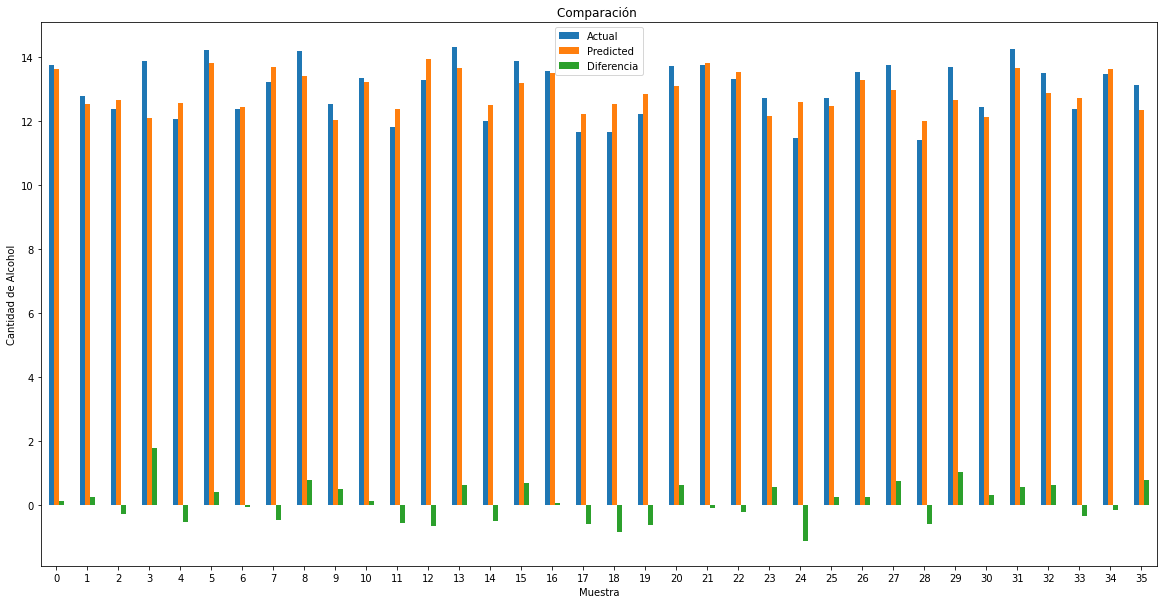

In [146]:
import matplotlib.pyplot as plt  # importamos la librería que nos permitirá graficar

# creamos un gráfico de barras con el dataframe que contiene nuestros datos actuales y de predicción
validacion.plot.bar(rot=0, figsize=(20, 10))

# indicamos el título del gráfico
plt.title("Comparación ")

# indicamos la etiqueta del eje de las x
plt.xlabel("Muestra")

# indicamos la etiqueta del eje de las y, la cantidad de calorías
plt.ylabel("Cantidad de Alcohol")

plt.show()  # desplegamos el gráfico

In [149]:
print('Puntaje del r2 ', r2_score(y_test, y_pred))
print('Error promedio ', mean_squared_error(y_test, y_pred))
print('Error de la raiz cuadrada del promedio of is',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Score del modelo', modelo_regresion.score(X_test, y_test))


Puntaje del r2  0.4651598625460165
Error promedio  0.38328129917000947
Error de la raiz cuadrada del promedio of is 0.619097164563051
Scrore del modelo 0.4651598625460165
